

### Projet Plateformes Big Data                         
Massamba THIOYE

#### 1.Créer un DataFrame airlineDF à partir des fichiers csv téléchargés. Puis affichez les premières lignes.


In [1]:

from pyspark.sql import SparkSession

# Initialiser SparkSession
spark = SparkSession.builder.appName("AirlineData").getOrCreate()

# Charger les fichiers CSV
df1998 = spark.read.csv("1998.csv", header=True, inferSchema=True)
df1999 = spark.read.csv("1999.csv", header=True, inferSchema=True)
df2000 = spark.read.csv("2000.csv", header=True, inferSchema=True)

# Concaténer les DataFrames
airlineDF = df1998.union(df1999).union(df2000)

# Afficher les premières lignes
airlineDF.show(10)


+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|1998|    1|        17|        6|    715|       715|    840|       840|           WN|       76

#### 2. Dans ce projet on ne s’intéresse qu’à certaines colonnes du DataFrame, les colonnes 1, 2, 3, 5, 7, 9, 17, 18 et 22. A partir du DataFrame airlineDF construire un second ne contenant que les colonnes énumérées, puis définir pour chacune de ces colonnes le type de données le plus adéquat.

In [2]:


from pyspark.sql.types import IntegerType, DoubleType, StringType


# Sélectionner les colonnes par index (0, 1, 2, 4, 6, 8, 16, 17, 21)
# Les colonnes sélectionnées seront celles aux indices spécifiés
selected_columns = [airlineDF.columns[i] for i in [0, 1, 2, 4, 6, 8, 16, 17, 21]]
airlineDF_filtered = airlineDF.select(*selected_columns)

# Définir les types de données pour chaque colonne
airlineDF_filtered = airlineDF_filtered \
    .withColumn("Year", airlineDF_filtered["Year"].cast(IntegerType())) \
    .withColumn("Month", airlineDF_filtered["Month"].cast(IntegerType())) \
    .withColumn("DayofMonth", airlineDF_filtered["DayofMonth"].cast(IntegerType())) \
    .withColumn("DepTime", airlineDF_filtered["DepTime"].cast(IntegerType())) \
    .withColumn("ArrTime", airlineDF_filtered["ArrTime"].cast(IntegerType())) \
    .withColumn("UniqueCarrier", airlineDF_filtered["UniqueCarrier"].cast(StringType())) \
    .withColumn("Dest", airlineDF_filtered["Dest"].cast(StringType())) \
    .withColumn("Cancelled", airlineDF_filtered["Cancelled"].cast(IntegerType()))

# Afficher les premières lignes du DataFrame filtré
airlineDF_filtered.show(5)

+----+-----+----------+-------+-------+-------------+------+----+---------+
|Year|Month|DayofMonth|DepTime|ArrTime|UniqueCarrier|Origin|Dest|Cancelled|
+----+-----+----------+-------+-------+-------------+------+----+---------+
|1998|    1|        17|    715|    840|           WN|   AUS| PHX|        0|
|1998|    1|        18|    715|    830|           WN|   AUS| PHX|        0|
|1998|    1|        19|    715|    831|           WN|   AUS| PHX|        0|
|1998|    1|        20|    715|    836|           WN|   AUS| PHX|        0|
|1998|    1|        21|    715|    836|           WN|   AUS| PHX|        0|
+----+-----+----------+-------+-------+-------------+------+----+---------+
only showing top 5 rows



#### 3. Afficher pour chaque mois de chaque année le nombre de vols annulés. Tracez le diagramme en bâton (choisir des couleurs différentes pour les années).

In [5]:
from pyspark.sql.functions import col, count

# Calculer le nombre de vols annulés par mois et par année, et trier par année et mois
cancelled_per_month = airlineDF_filtered.groupBy("Year", "Month") \
    .sum("Cancelled") \
    .withColumnRenamed("sum(Cancelled)", "TotalCancelled") \
    .orderBy(col("Year").asc(), col("Month").asc())

# Afficher les résultats
cancelled_per_month.show()


+----+-----+--------------+
|Year|Month|TotalCancelled|
+----+-----+--------------+
|1998|    1|         13880|
|1998|    2|         10484|
|1998|    3|          9847|
|1998|    4|          6952|
|1998|    5|          9393|
|1998|    6|         12870|
|1998|    7|          9330|
|1998|    8|         14726|
|1998|    9|         32893|
|1998|   10|          7815|
|1998|   11|          6419|
|1998|   12|          9900|
|1999|    1|         26543|
|1999|    2|         14523|
|1999|    3|         12419|
|1999|    4|          8923|
|1999|    5|         11857|
|1999|    6|         12676|
|1999|    7|         14873|
|1999|    8|         11711|
+----+-----+--------------+
only showing top 20 rows



In [6]:
# Convertir en DataFrame Pandas
cancelled_per_month_pd = cancelled_per_month.toPandas()

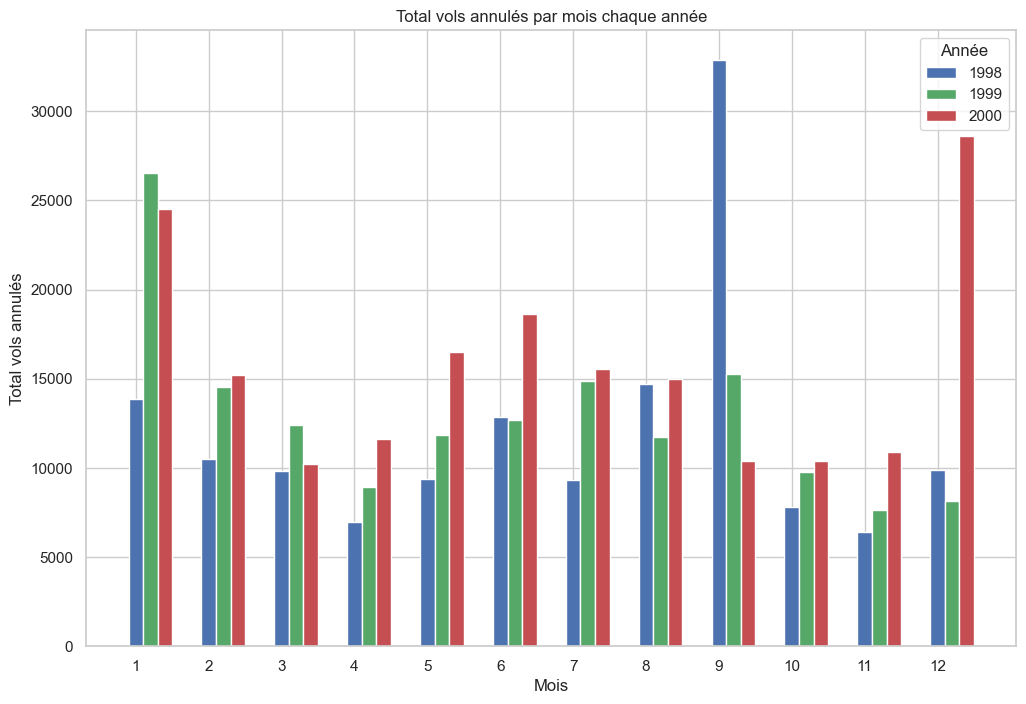

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer le diagramme en bâtons
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

years = cancelled_per_month_pd['Year'].unique()
colors = ['b', 'g', 'r']

for i, year in enumerate(years):
    data = cancelled_per_month_pd[cancelled_per_month_pd['Year'] == year]
    plt.bar(data['Month'] + i*0.2, data['TotalCancelled'], width=0.2, label=str(year), color=colors[i])

plt.xlabel("Mois")
plt.ylabel("Total vols annulés")
plt.title("Total vols annulés par mois chaque année")
plt.xticks(range(1, 13))
plt.legend(title="Année")
plt.show()

#### 4. Construire pour chacune des 3 années un DataFrame contenant pour chaque compagnie le nombre de vols confirmés par mois. Puis afficher le contenu du DataFrame.

In [8]:
from pyspark.sql import functions as F

# Filtrer les vols confirmés (non annulés)
confirmed_flights = airlineDF_filtered.filter(F.col("Cancelled") == 0)

# Liste des mois sous forme de noms de colonnes
months = ["jan", "fev", "mars", "avr", "mai", "juin", "juil", "aou", "sep", "oct", "nov", "dec"]

# Créer un DataFrame pour chaque année
for year in [1998, 1999, 2000]:
    # Filtrer par année
    flights_per_year = confirmed_flights.filter(F.col("Year") == year)
    
    # Calculer le nombre de vols confirmés par mois pour chaque compagnie
    flights_per_year_grouped = flights_per_year.groupBy("UniqueCarrier") \
        .pivot("Month", [i + 1 for i in range(12)]) \
        .agg(F.count("*").alias("ConfirmedFlights")) \
        .orderBy("UniqueCarrier")
    
    # Renommer les colonnes pour utiliser les noms de mois
    flights_per_year_grouped = flights_per_year_grouped.select(
        F.col("UniqueCarrier"),
        *[F.col(str(i+1)).alias(months[i]) for i in range(12)]
    )
    
    # Afficher le DataFrame pour l'année en cours
    print(f"Année : {year}")
    flights_per_year_grouped.show(truncate=False)


Année : 1998
+-------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|UniqueCarrier|jan  |fev  |mars |avr  |mai  |juin |juil |aou  |sep  |oct  |nov  |dec  |
+-------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|AA           |54111|49212|54359|53056|53672|52670|54520|54628|52669|54259|52555|53546|
|AS           |11408|10652|12266|11899|12409|12940|13681|13856|12814|12670|11865|12250|
|CO           |32247|29706|33779|32831|32919|32258|33815|33678|31964|33413|31843|33558|
|DL           |76670|68765|77519|74568|76804|73709|76243|76685|73350|75359|72596|75902|
|HP           |16538|15164|16962|16377|17007|16590|16968|17005|16101|17034|16121|16725|
|NW           |43489|40184|44531|41858|40482|40445|44081|40309|17961|44000|42311|43591|
|TW           |22179|20915|23019|22485|22210|22282|22733|23186|21854|22735|21458|22454|
|UA           |59025|54656|61417|59533|60013|60444|63577|64314|61039|63400|59043|61314|
|US           |5621

#### 5. Dans une nouvelle figure, affichez pour chaque année une courbe qui décrit l’évolution par jour (jour 1 à 365 ou 366) du nombre de vols annulés (choisir des couleurs différentes pour les années).

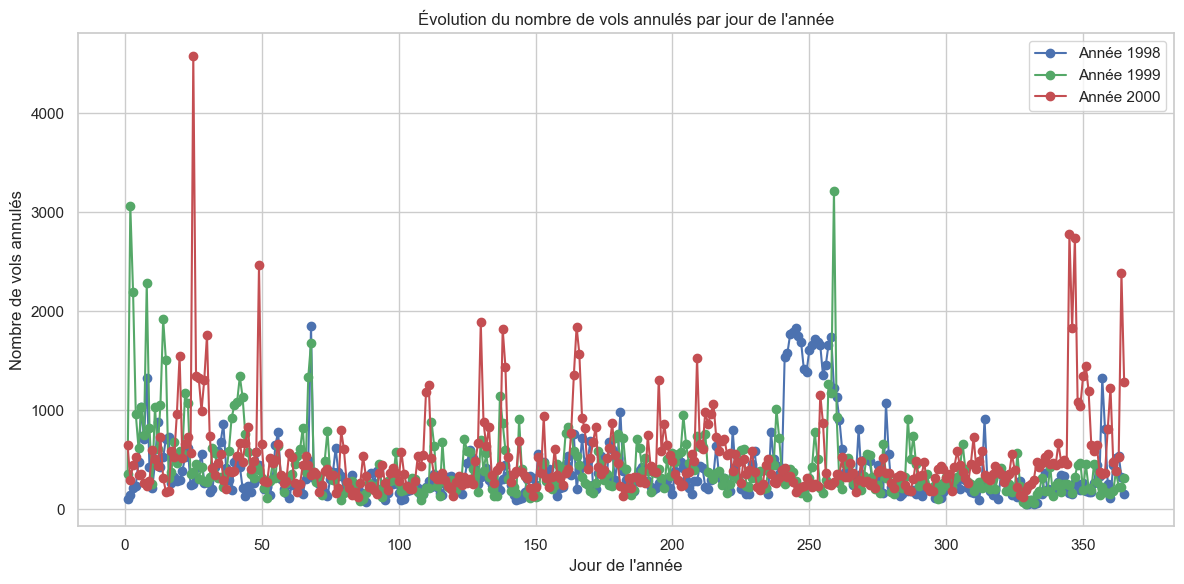

In [9]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt

# Nombre de jours dans chaque mois (non bissextile)
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Calculer les jours cumulés jusqu'à chaque mois
cumulative_days = [sum(days_in_month[:i]) for i in range(12)]

# Fonction UDF pour calculer le jour de l'année
def day_of_year(month, day):
    return cumulative_days[month - 1] + day

day_of_year_udf = F.udf(day_of_year, IntegerType())

# Ajouter une colonne pour le jour de l'année
airlineDF_filtered = airlineDF.withColumn(
    "DayOfYear",
    day_of_year_udf(F.col("Month"), F.col("DayofMonth"))
)

# Liste des années à analyser
years = [1998, 1999, 2000]

# Tracer les courbes
plt.figure(figsize=(12, 6))

colors = ['b', 'g', 'r']  # Couleurs pour chaque année

for i, year in enumerate(years):
    # Filtrer par année
    flights_per_year = airlineDF_filtered.filter(F.col("Year") == year)
    
    # Calculer le nombre de vols annulés par jour de l'année
    daily_cancelled_counts = flights_per_year.filter(F.col("Cancelled") == 1) \
        .groupBy("DayOfYear") \
        .agg(F.count("Cancelled").alias("CancelledCount")) \
        .orderBy("DayOfYear")
    
    # Convertir en DataFrame Pandas pour la visualisation
    daily_cancelled_counts_pd = daily_cancelled_counts.toPandas()
    
    # Tracer la courbe pour l'année en cours
    plt.plot(
        daily_cancelled_counts_pd["DayOfYear"],
        daily_cancelled_counts_pd["CancelledCount"],
        marker='o',
        linestyle='-',
        color=colors[i],
        label=f"Année {year}"
    )

# Ajouter les titres et les labels
plt.title("Évolution du nombre de vols annulés par jour de l'année")
plt.xlabel("Jour de l'année")
plt.ylabel("Nombre de vols annulés")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()



####  6. Sur ces trois années consécutives, combien avons-nous en moyenne de vols annulés le 25 décembre?

In [10]:
# Filtrer les données pour le 25 décembre
dec_25_flights = airlineDF_filtered.filter(
    (F.col("Month") == 12) & (F.col("DayofMonth") == 25)
)

# Calculer le nombre de vols annulés le 25 décembre pour chaque année
dec_25_cancelled_counts = dec_25_flights.filter(F.col("Cancelled") == 1) \
    .groupBy("Year") \
    .agg(F.count("Cancelled").alias("CancelledCount"))

# Convertir en DataFrame Pandas pour le calcul de la moyenne
dec_25_cancelled_counts_pd = dec_25_cancelled_counts.toPandas()

# Calculer la moyenne
average_cancelled = dec_25_cancelled_counts_pd["CancelledCount"].mean()

print(f"Nombre moyen de vols annulés le 25 décembre sur les années 1998, 1999, et 2000 : {average_cancelled:.2f}")

Nombre moyen de vols annulés le 25 décembre sur les années 1998, 1999, et 2000 : 413.33
